# PART 2 - C

## LRM with Time Dummy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Preparation

In [37]:
msci = pd.read_excel('MSCI hong kong LSEG.xlsx')
msci.dropna(inplace=True)
msci['Date'] = pd.to_datetime(msci['Date'])
msci.head()

,Date,Last_PX
0,2022-12-31,10467.629
1,2022-11-30,9684.181
2,2022-10-31,7808.116
3,2022-09-30,8897.339
4,2022-08-31,10013.875


In [38]:
msci.rename(columns = {'Last_PX' : 'MSCI Last Px'}, inplace=True)
msci.head()

,Date,MSCI Last Px
0,2022-12-31,10467.629
1,2022-11-30,9684.181
2,2022-10-31,7808.116
3,2022-09-30,8897.339
4,2022-08-31,10013.875


In [39]:
msci.sort_values(by = ['Date'], inplace = True)
msci.reset_index(drop=True, inplace = True)
msci.head()

,Date,MSCI Last Px
0,2014-12-31,9770.616
1,2015-01-31,10311.065
2,2015-02-28,10253.753
3,2015-03-31,10292.687
4,2015-04-30,11215.593


In [40]:
msci['MSCI Returns'] = np.log(msci['MSCI Last Px']).diff()
msci.drop(index = [0], columns = ['MSCI Last Px'], inplace = True)
msci.reset_index(drop=True, inplace = True)
msci.head()

,Date,MSCI Returns
0,2015-01-31,0.053838
1,2015-02-28,-0.005574
2,2015-03-31,0.003790
3,2015-04-30,0.085871
4,2015-05-31,-0.010363


In [41]:
var = pd.read_excel('Variables (Monthly).xlsx')
var.head()

,Date,Tot Number of Testing (Monthly),Hang Seng Last Px,Stringency Index
0,2022-12-31,190912.0,2535.53,44.565484
1,2022-11-30,266718.0,2382.12,48.150000
2,2022-10-31,285307.0,1871.10,51.524839
3,2022-09-30,354428.0,2193.99,54.075000
4,2022-08-31,454504.0,2542.22,52.780000


In [42]:
#var.isna().sum()
var = var.fillna(0)
var.tail()

,Date,Tot Number of Testing (Monthly),Hang Seng Last Px,Stringency Index
92,2015-04-30,0.0,3629.41,0.0
93,2015-03-31,0.0,3211.82,0.0
94,2015-02-28,0.0,3200.65,0.0
95,2015-01-31,0.0,3161.06,0.0
96,2014-12-31,0.0,3044.28,0.0


In [43]:
var.sort_values(by = ['Date'], inplace = True)
var.reset_index(drop = True, inplace = True )
var.head()

,Date,Tot Number of Testing (Monthly),Hang Seng Last Px,Stringency Index
0,2014-12-31,0.0,3044.28,0.0
1,2015-01-31,0.0,3161.06,0.0
2,2015-02-28,0.0,3200.65,0.0
3,2015-03-31,0.0,3211.82,0.0
4,2015-04-30,0.0,3629.41,0.0


In [44]:
var['Hang Seng Returns'] = np.log(var['Hang Seng Last Px']).diff()
var.drop(index = [0], columns = ['Hang Seng Last Px'], inplace = True)
var.reset_index(drop = True, inplace = True)
var.head()

,Date,Tot Number of Testing (Monthly),Stringency Index,Hang Seng Returns
0,2015-01-31,0.0,0.0,0.037643
1,2015-02-28,0.0,0.0,0.012446
2,2015-03-31,0.0,0.0,0.003484
3,2015-04-30,0.0,0.0,0.122232
4,2015-05-31,0.0,0.0,-0.025777


In [45]:
msci = msci.merge(var, on = 'Date', how = 'outer')
msci.tail()

,Date,MSCI Returns,Tot Number of Testing (Monthly),Stringency Index,Hang Seng Returns
91,2022-08-31,-0.040487,454504.0,52.780000,-0.009977
92,2022-09-30,-0.118219,354428.0,54.075000,-0.147316
93,2022-10-31,-0.130589,285307.0,51.524839,-0.159195
94,2022-11-30,0.215330,266718.0,48.150000,0.241464
95,2022-12-31,0.077794,190912.0,44.565484,0.062412


In [46]:
var_daily = pd.read_csv('Daily variables.csv')
var_daily.head()

,Date,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of death cases,Number of discharge cases,Number of hospitalised cases in critical condition,Number of death cases related to COVID-19
0,08-Jan-20,0.0,21.0,17.0,0,0.0,NaN,NaN
1,09-Jan-20,0.0,25.0,23.0,0,0.0,NaN,NaN
2,10-Jan-20,0.0,31.0,23.0,0,0.0,NaN,NaN
3,11-Jan-20,0.0,46.0,15.0,0,0.0,NaN,NaN
4,12-Jan-20,0.0,51.0,16.0,0,0.0,NaN,NaN


In [47]:
var_daily = var_daily.fillna(0)
var_daily['Date'] = pd.to_datetime(var_daily['Date'])
var_daily.head()

/tmp/ipython-input-3383572847.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  var_daily['Date'] = pd.to_datetime(var_daily['Date'])


,Date,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of death cases,Number of discharge cases,Number of hospitalised cases in critical condition,Number of death cases related to COVID-19
0,2020-01-08,0.0,21.0,17.0,0,0.0,0.0,0.0
1,2020-01-09,0.0,25.0,23.0,0,0.0,0.0,0.0
2,2020-01-10,0.0,31.0,23.0,0,0.0,0.0,0.0
3,2020-01-11,0.0,46.0,15.0,0,0.0,0.0,0.0
4,2020-01-12,0.0,51.0,16.0,0,0.0,0.0,0.0


In [48]:
var_daily.sort_values(by = ['Date'], inplace = True)
var_daily.reset_index(drop = True, inplace = True)
var_daily.head()

,Date,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of death cases,Number of discharge cases,Number of hospitalised cases in critical condition,Number of death cases related to COVID-19
0,2020-01-08,0.0,21.0,17.0,0,0.0,0.0,0.0
1,2020-01-09,0.0,25.0,23.0,0,0.0,0.0,0.0
2,2020-01-10,0.0,31.0,23.0,0,0.0,0.0,0.0
3,2020-01-11,0.0,46.0,15.0,0,0.0,0.0,0.0
4,2020-01-12,0.0,51.0,16.0,0,0.0,0.0,0.0


In [49]:
var_daily.tail()

,Date,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of death cases,Number of discharge cases,Number of hospitalised cases in critical condition,Number of death cases related to COVID-19
1084,2022-12-27,0.0,0.0,0.0,11562,0.0,47.0,0.0
1085,2022-12-28,0.0,0.0,0.0,11621,0.0,49.0,0.0
1086,2022-12-29,0.0,0.0,0.0,11683,0.0,50.0,0.0
1087,2022-12-30,0.0,0.0,0.0,11755,0.0,55.0,0.0
1088,2022-12-31,0.0,0.0,0.0,11807,0.0,53.0,0.0


In [50]:
var_daily = var_daily.set_index('Date')
var_daily.head()

,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of death cases,Number of discharge cases,Number of hospitalised cases in critical condition,Number of death cases related to COVID-19
Date,,,,,,,
2020-01-08,0.0,21.0,17.0,0,0.0,0.0,0.0
2020-01-09,0.0,25.0,23.0,0,0.0,0.0,0.0
2020-01-10,0.0,31.0,23.0,0,0.0,0.0,0.0
2020-01-11,0.0,46.0,15.0,0,0.0,0.0,0.0
2020-01-12,0.0,51.0,16.0,0,0.0,0.0,0.0


In [51]:
var_daily = var_daily.resample('M').sum()
var_daily.head()

/tmp/ipython-input-3213890552.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  var_daily = var_daily.resample('M').sum()


,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of death cases,Number of discharge cases,Number of hospitalised cases in critical condition,Number of death cases related to COVID-19
Date,,,,,,,
2020-01-31,71.0,3589.0,1649.0,0,0.0,0.0,0.0
2020-02-29,1552.0,36221.0,4037.0,37,201.0,0.0,0.0
2020-03-31,7781.0,91738.0,6380.0,105,2556.0,0.0,0.0
2020-04-30,29364.0,28932.0,706.0,120,14538.0,231.0,0.0
2020-05-31,32700.0,0.0,0.0,124,30698.0,40.0,0.0


In [52]:
var_daily.tail()

,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of death cases,Number of discharge cases,Number of hospitalised cases in critical condition,Number of death cases related to COVID-19
Date,,,,,,,
2022-08-31,0.0,0.0,0.0,297218,2199172.0,306.0,0.0
2022-09-30,0.0,0.0,0.0,296828,2401524.0,431.0,0.0
2022-10-31,0.0,0.0,0.0,318529,2735571.0,313.0,0.0
2022-11-30,0.0,0.0,0.0,316833,2854598.0,339.0,0.0
2022-12-31,0.0,0.0,0.0,346164,399402.0,1038.0,0.0


### Creating the Proxies

**Mortality Index** > Case Fatality Ratio (CFR)
* Baud, D., et al. “Real estimates of mortality following COVID-19 infection.” The Lancet Infectious Diseases, 2020 > [link](https://pubmed.ncbi.nlm.nih.gov/32171390/)


**Severity Index** > Diseas severity
* Guan, W.-J., et al. “Clinical characteristics of coronavirus disease 2019 in China.” New England Journal of Medicine, 2020 >
[link](https://pubmed.ncbi.nlm.nih.gov/32109013/)


The idea of building a 'fear index' by combining observed variables is inspired by studies that construct financial volatility:
* Whaley, R. “Derivatives on Market Volatility.” Journal of Derivatives, 2000 > [link](https://www.pm-research.com/content/iijderiv/1/1/71)

In [53]:
# Outbreak severity

var_daily['Outbreak severity'] = var_daily['Number of hospitalised cases in critical condition'] + var_daily['Number of death cases related to COVID-19']/var_daily['Number of confirmed cases']

In [54]:
# Spread Index

var_daily['Spread'] = var_daily['Number of confirmed cases']/msci['Tot Number of Testing (Monthly)']


In [55]:
# Recovery Index

var_daily['Recovery'] = (var_daily['Number of discharge cases'] + var_daily['Number of ruled out cases'])/var_daily['Number of confirmed cases']

In [56]:
var_daily.tail()

,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of death cases,Number of discharge cases,Number of hospitalised cases in critical condition,Number of death cases related to COVID-19,Outbreak severity,Spread,Recovery
Date,,,,,,,,,,
2022-08-31,0.0,0.0,0.0,297218,2199172.0,306.0,0.0,NaN,NaN,inf
2022-09-30,0.0,0.0,0.0,296828,2401524.0,431.0,0.0,NaN,NaN,inf
2022-10-31,0.0,0.0,0.0,318529,2735571.0,313.0,0.0,NaN,NaN,inf
2022-11-30,0.0,0.0,0.0,316833,2854598.0,339.0,0.0,NaN,NaN,inf
2022-12-31,0.0,0.0,0.0,346164,399402.0,1038.0,0.0,NaN,NaN,inf


In [57]:
var_daily = var_daily.fillna(0)
var_daily = var_daily.replace([np.inf, -np.inf], 0) # replacing all inf values
var_daily.tail()

,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of death cases,Number of discharge cases,Number of hospitalised cases in critical condition,Number of death cases related to COVID-19,Outbreak severity,Spread,Recovery
Date,,,,,,,,,,
2022-08-31,0.0,0.0,0.0,297218,2199172.0,306.0,0.0,0.0,0.0,0.0
2022-09-30,0.0,0.0,0.0,296828,2401524.0,431.0,0.0,0.0,0.0,0.0
2022-10-31,0.0,0.0,0.0,318529,2735571.0,313.0,0.0,0.0,0.0,0.0
2022-11-30,0.0,0.0,0.0,316833,2854598.0,339.0,0.0,0.0,0.0,0.0
2022-12-31,0.0,0.0,0.0,346164,399402.0,1038.0,0.0,0.0,0.0,0.0


In [58]:
msci = msci.merge(var_daily, on = 'Date', how = 'outer')
msci.head()

,Date,MSCI Returns,Tot Number of Testing (Monthly),Stringency Index,Hang Seng Returns,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of death cases,Number of discharge cases,Number of hospitalised cases in critical condition,Number of death cases related to COVID-19,Outbreak severity,Spread,Recovery
0,2015-01-31,0.053838,0.0,0.0,0.037643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-28,-0.005574,0.0,0.0,0.012446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-03-31,0.003790,0.0,0.0,0.003484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-04-30,0.085871,0.0,0.0,0.122232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-05-31,-0.010363,0.0,0.0,-0.025777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
msci = msci.fillna(0)
msci.head()

,Date,MSCI Returns,Tot Number of Testing (Monthly),Stringency Index,Hang Seng Returns,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of death cases,Number of discharge cases,Number of hospitalised cases in critical condition,Number of death cases related to COVID-19,Outbreak severity,Spread,Recovery
0,2015-01-31,0.053838,0.0,0.0,0.037643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-02-28,-0.005574,0.0,0.0,0.012446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-03-31,0.003790,0.0,0.0,0.003484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-04-30,0.085871,0.0,0.0,0.122232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-05-31,-0.010363,0.0,0.0,-0.025777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
msci = msci.set_index('Date')

In [61]:
msci.head()

,MSCI Returns,Tot Number of Testing (Monthly),Stringency Index,Hang Seng Returns,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of death cases,Number of discharge cases,Number of hospitalised cases in critical condition,Number of death cases related to COVID-19,Outbreak severity,Spread,Recovery
Date,,,,,,,,,,,,,,
2015-01-31,0.053838,0.0,0.0,0.037643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-28,-0.005574,0.0,0.0,0.012446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-03-31,0.003790,0.0,0.0,0.003484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-04-30,0.085871,0.0,0.0,0.122232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-05-31,-0.010363,0.0,0.0,-0.025777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
msci.drop(columns = ['Tot Number of Testing (Monthly)','Number of confirmed cases', 'Number of ruled out cases',
                     'Number of cases still hospitalised for investigation',
                     'Number of death cases', 'Number of discharge cases', 'Number of hospitalised cases in critical condition'],inplace = True)

In [63]:
msci.head()

,MSCI Returns,Stringency Index,Hang Seng Returns,Number of death cases related to COVID-19,Outbreak severity,Spread,Recovery
Date,,,,,,,
2015-01-31,0.053838,0.0,0.037643,0.0,0.0,0.0,0.0
2015-02-28,-0.005574,0.0,0.012446,0.0,0.0,0.0,0.0
2015-03-31,0.003790,0.0,0.003484,0.0,0.0,0.0,0.0
2015-04-30,0.085871,0.0,0.122232,0.0,0.0,0.0,0.0
2015-05-31,-0.010363,0.0,-0.025777,0.0,0.0,0.0,0.0


### Fitting the Model

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [64]:
covid_period = '2020-01-31'
covid_end = '2022-12-31'

msci['Time Dummy'] = ((msci.index >= covid_period) & (msci.index <= covid_end)).astype(int)

In [65]:
if covid_period in msci.index:
  print('True')

True


In [66]:
if covid_end in msci.index:
  print('True')

True


In [67]:
# Interaction term
msci['MSCI Covid'] = msci['MSCI Returns'] * msci['Time Dummy']

In [68]:
x = msci['Time Dummy']
x = sm.add_constant(x)

y = msci['MSCI Returns']

m = sm.OLS(y, x).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:           MSCI Returns   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3007
Date:                Thu, 19 Feb 2026   Prob (F-statistic):              0.585
Time:                        16:05:42   Log-Likelihood:                 139.31
No. Observations:                  96   AIC:                            -274.6
Df Residuals:                      94   BIC:                            -269.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.007      0.433      0.6

In [69]:
x = msci.drop(columns='MSCI Returns')
x = sm.add_constant(x)

y = msci['MSCI Returns']

model = sm.OLS(y, x).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:           MSCI Returns   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     121.6
Date:                Thu, 19 Feb 2026   Prob (F-statistic):           1.09e-40
Time:                        16:05:46   Log-Likelihood:                 245.68
No. Observations:                  96   AIC:                            -477.4
Df Residuals:                      89   BIC:                            -459.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

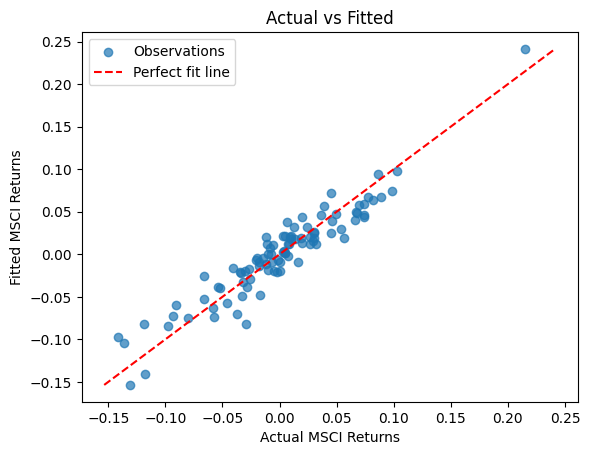

In [71]:
residuals = model.resid
y_fitted = model.fittedvalues # get the fitted value of Y

plt.scatter(y, y_fitted, alpha=0.7, label="Observations")

# 45-degree line: if model were perfect, points would lie here
min_val = min(y.min(), y_fitted.min())
max_val = max(y.max(), y_fitted.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect fit line")

plt.xlabel("Actual MSCI Returns")
plt.ylabel("Fitted MSCI Returns")
plt.title("Actual vs Fitted")
plt.legend()
plt.show()

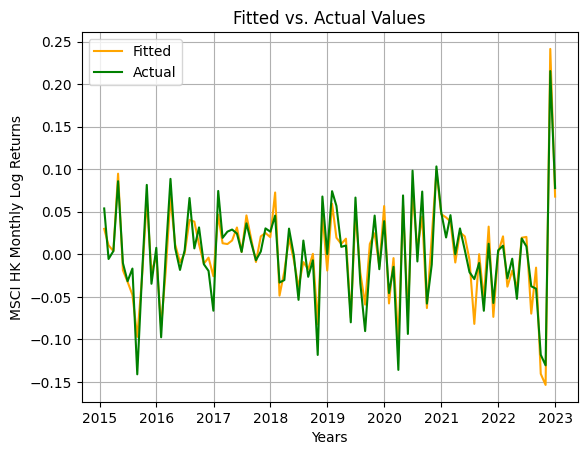

In [75]:
plt.plot(y_fitted, color = 'orange', label='Fitted')
plt.plot(y, color = 'green', label = 'Actual')
plt.grid(True)
plt.xlabel("Years")
plt.ylabel("MSCI HK Monthly Log Returns")
plt.title("Fitted vs. Actual Values")
plt.legend()
plt.show()

### Multicollinearity Testing

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = x.drop(columns=['const'])

vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif_df

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Variable,VIF
0,Stringency Index,62.349778
1,Hang Seng Returns,1.904753
2,Number of death cases related to COVID-19,NaN
3,Outbreak severity,1.662791
4,Spread,NaN
5,Recovery,1.932029
6,Time Dummy,62.061053
7,MSCI Covid,2.017313


In [ ]:
# Dropping the variables with VIF > 10

x = msci.drop(columns = ['Stringency Index', 'Time Dummy','MSCI Returns'])
x = sm.add_constant(x)

y = msci['MSCI Returns']

model_vif = sm.OLS(y, x).fit()
print(model_vif.summary())


                            OLS Regression Results                            
Dep. Variable:           MSCI Returns   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     184.4
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           9.33e-43
Time:                        11:47:46   Log-Likelihood:                 245.18
No. Observations:                  96   AIC:                            -480.4
Df Residuals:                      91   BIC:                            -467.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

## ARCH Model

In [ ]:
!pip install arch

In [77]:
from arch import arch_model

In [78]:
y = msci['MSCI Returns']
y = y * 10

In [79]:
arch_mod = arch_model(y, vol='ARCH', p=1, q=0, mean='Zero') # even if p is increased, alpha is not significant
# > current error term (volatility) is not affected by past shock
arch_fit = arch_mod.fit(disp='off')
print(arch_fit.summary())


                        Zero Mean - ARCH Model Results                        
Dep. Variable:           MSCI Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.010
Vol Model:                       ARCH   Log-Likelihood:               -79.2315
Distribution:                  Normal   AIC:                           162.463
Method:            Maximum Likelihood   BIC:                           167.592
                                        No. Observations:                   96
Date:                Thu, Feb 19 2026   Df Residuals:                       96
Time:                        16:19:18   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2584  4.751e-02      5.438  5.388e-08    [  

## GARCH Model

In [80]:
import statsmodels.api as sm

x = msci.drop(columns=['MSCI Returns', 'Spread', 'Number of death cases related to COVID-19', 'Stringency Index','Time Dummy'])
# dropping vars with variance = 0
y = y * 10

garch = arch_model(y,mean='ARX',x=x,lags=0,vol='GARCH',p=1,q=1)

garch_res = garch.fit(disp='off')
print(garch_res.summary())

                          AR-X - GARCH Model Results                          
Dep. Variable:           MSCI Returns   R-squared:                       0.890
Mean Model:                      AR-X   Adj. R-squared:                  0.885
Vol Model:                      GARCH   Log-Likelihood:               -196.911
Distribution:                  Normal   AIC:                           409.821
Method:            Maximum Likelihood   BIC:                           430.336
                                        No. Observations:                   96
Date:                Thu, Feb 19 2026   Df Residuals:                       91
Time:                        16:25:19   Df Model:                            5
                                     Mean Model                                     
                        coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------------
Const                 0.1936      